Ví dụ minh họa việc sử dụng phân cụm (clustering ) để thực hiện phân đoạn hình ảnh (image segmentation). Sử dụng thuật toán k-means.


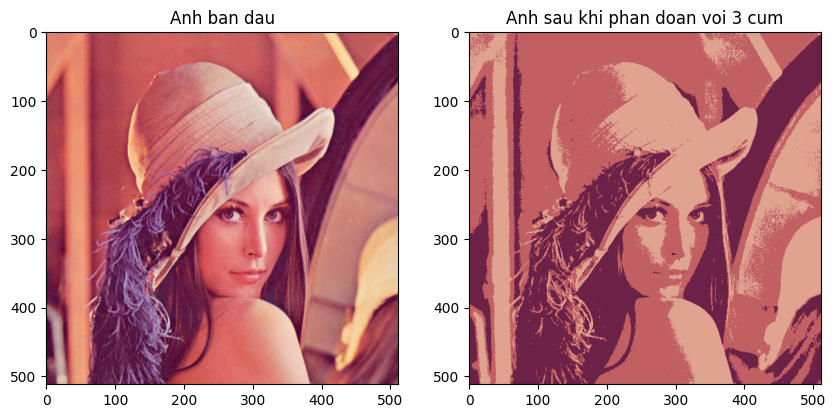

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = cv2.imread('lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

K = 3
kmeans = KMeans(n_clusters=K, random_state=0)

kmeans.fit(pixel_values)

segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

segmented_image = np.uint8(segmented_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Anh ban dau')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Anh sau khi phan doan voi {K} cum')

plt.show()


a) Thay đổi số lượng cụm để xem ảnh hưởng đến phân đoạn hình ảnh

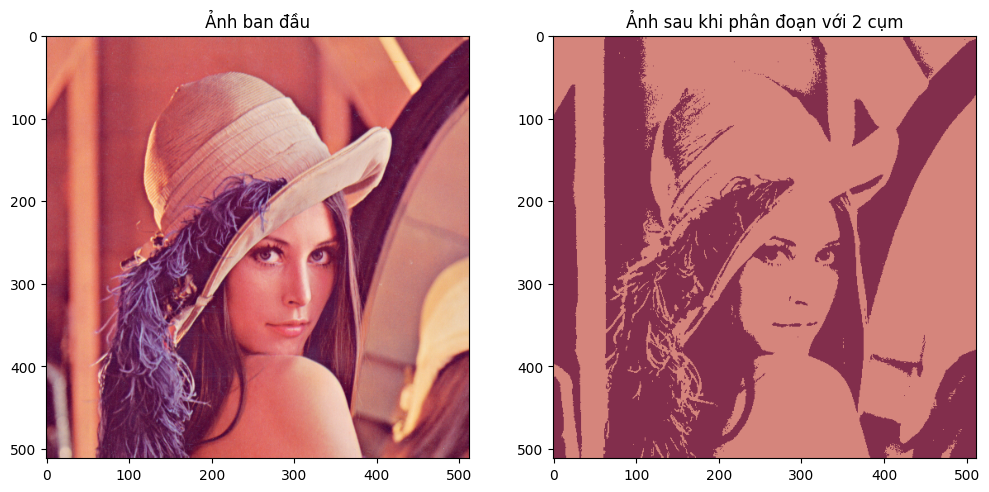

Các màu chủ đạo với 2 cụm: [[213.55078  133.97543  124.56591 ]
 [130.22955   46.670864  76.68901 ]]


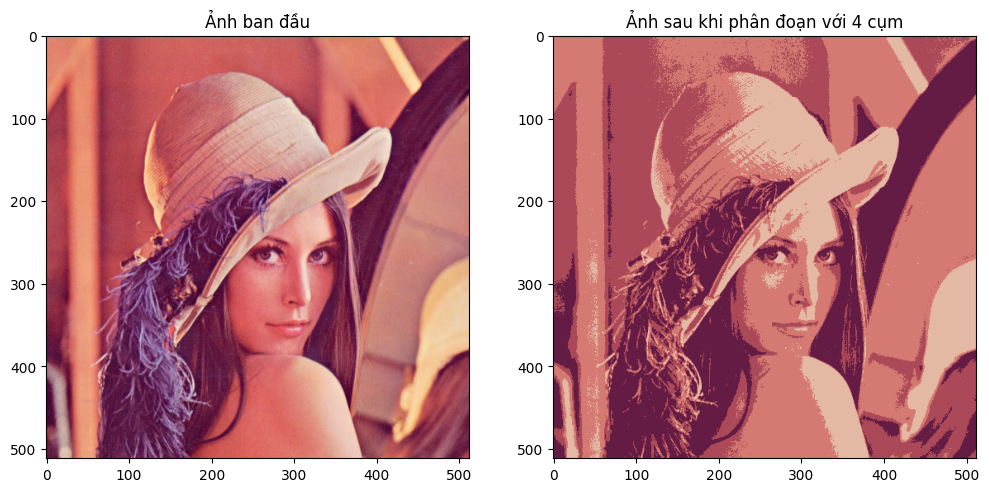

Các màu chủ đạo với 4 cụm: [[228.52228  185.4958   163.87248 ]
 [171.71786   73.72299   88.76192 ]
 [100.898315  28.592041  68.88221 ]
 [212.02707  122.29184  114.48735 ]]


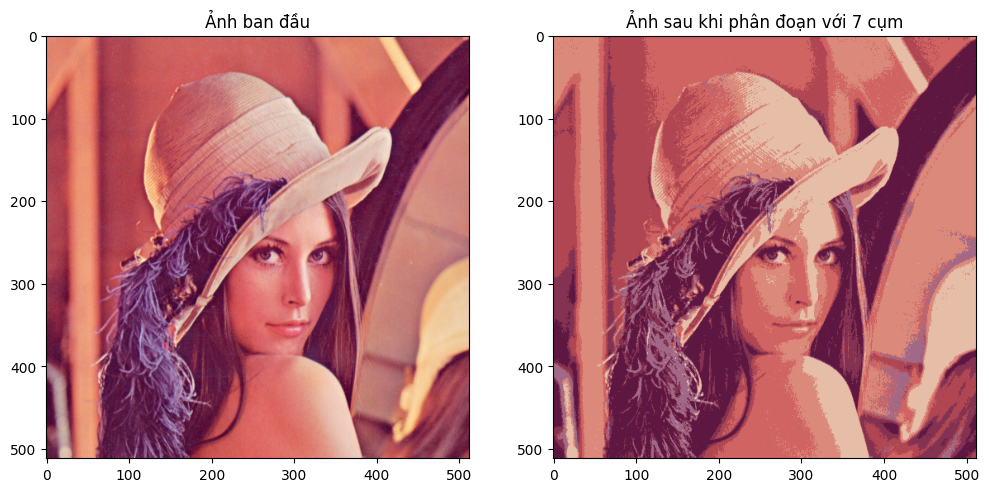

Các màu chủ đạo với 7 cụm: [[218.03812  137.64818  122.87985 ]
 [175.17296   70.62674   82.22814 ]
 [132.3069    50.684402  82.39997 ]
 [208.47633  100.95143   98.69062 ]
 [230.11978  190.29549  167.40936 ]
 [ 94.11907   23.725166  65.524216]
 [161.71469  105.88532  135.05312 ]]


In [2]:
cluster_numbers = [2, 4, 7]
for K in cluster_numbers:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(pixel_values)
    
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)
    segmented_image = np.uint8(segmented_image)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Ảnh ban đầu')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f'Ảnh sau khi phân đoạn với {K} cụm')
    plt.show()
    
    print(f"Các màu chủ đạo với {K} cụm:", kmeans.cluster_centers_)

b) Thay đổi phương pháp khởi tạo thành ngẫu nhiên

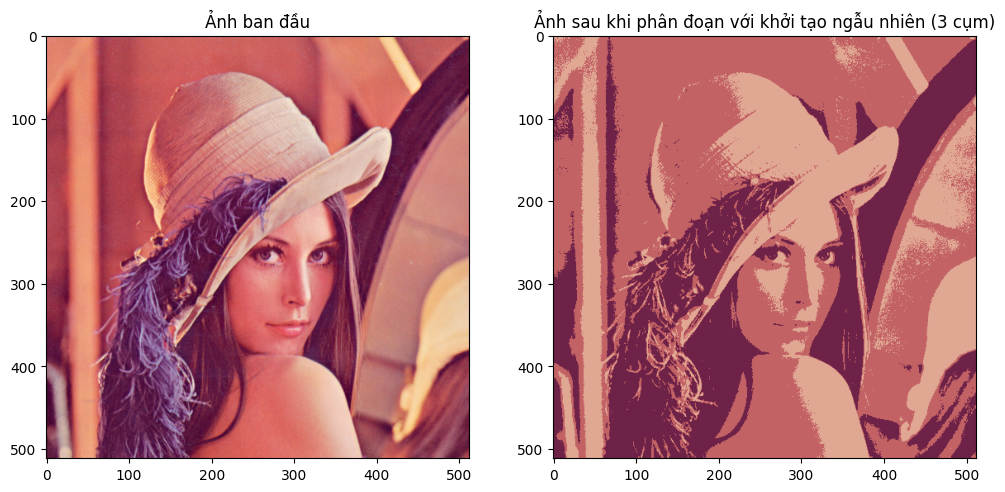

Các màu chủ đạo với khởi tạo ngẫu nhiên (3 cụm): [[110.03139  34.45073  71.88744]
 [195.5126   98.19527 101.02378]
 [224.99075 167.17557 147.88393]]


In [3]:
K = 3  

kmeans_random = KMeans(n_clusters=K, init='random', random_state=0)
kmeans_random.fit(pixel_values)

segmented_image_random = kmeans_random.cluster_centers_[kmeans_random.labels_]
segmented_image_random = segmented_image_random.reshape(image.shape)
segmented_image_random = np.uint8(segmented_image_random)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Ảnh ban đầu')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_random)
plt.title(f'Ảnh sau khi phân đoạn với khởi tạo ngẫu nhiên ({K} cụm)')
plt.show()

print(f"Các màu chủ đạo với khởi tạo ngẫu nhiên ({K} cụm):", kmeans_random.cluster_centers_)


c) Trực quan hóa các màu chủ đạo (trung tâm cụm)

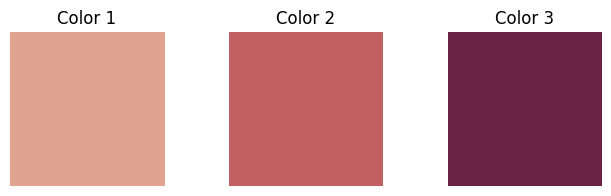

Các màu chủ đạo là: [[223 163 144]
 [193  95  99]
 [108  33  71]]


In [5]:
K = 3  

kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
kmeans.fit(pixel_values)

dominant_colors = np.uint8(kmeans.cluster_centers_)

plt.figure(figsize=(8, 2))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, K, i + 1)
    plt.imshow([[color]])
    plt.axis("off")
    plt.title(f"Color {i + 1}")
plt.show()

print("Các màu chủ đạo là:", dominant_colors)
